In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
train2 = pd.read_csv('D:/Data Science/Projet Kaggle/Predict Future Sales/Data/sales_train_v2.csv')

In [7]:
train2['date'] = train2['date'].str.slice(0, 16)
train2['date'] = pd.to_datetime(train2['date'], utc=True, format='%d.%m.%Y')

In [8]:
train2['day'] = train2['date'].dt.day
train2['month'] = train2['date'].dt.month
train2['year'] = train2['date'].dt.year

In [9]:
train2.drop(['date'], axis=1, inplace=True)

In [10]:
train2.fillna(0,inplace = True)

In [11]:
train2.isnull().sum()

date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
day               0
month             0
year              0
dtype: int64

In [12]:
train2.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
0,0,59,22154,999.00,1.0,2,1,2013
1,0,25,2552,899.00,1.0,3,1,2013
2,0,25,2552,899.00,-1.0,5,1,2013
3,0,25,2554,1709.05,1.0,6,1,2013
4,0,25,2555,1099.00,1.0,15,1,2013


In [13]:
train2 = train2.groupby(['shop_id','item_id','month'])[['item_price','item_cnt_day']].mean().reset_index()

In [14]:
train2.head()

,shop_id,item_id,month,item_price,item_cnt_day
0,0,30,2,265.0,3.444444
1,0,31,2,434.0,1.571429
2,0,32,1,221.0,1.500000
3,0,32,2,221.0,1.428571
4,0,33,1,347.0,1.000000


In [15]:
train_avg_itm_cnt_mnth = train2.groupby(['shop_id'])[['item_price','item_cnt_day']].mean().reset_index()

In [16]:
train_avg_itm_cnt_mnth.count()

shop_id         60
item_price      60
item_cnt_day    60
dtype: int64

In [17]:
test = pd.read_csv('D:/Data Science/Projet Kaggle/Predict Future Sales/Data/test.csv')

In [18]:
test.shape

(214200, 3)

In [19]:
train_3 = train2.groupby(['shop_id','item_id'])[['item_price','item_cnt_day']].sum().reset_index()

In [20]:
test_set = pd.merge(train_3, test, how='inner', on=['shop_id','item_id'])

In [21]:
test_set.shape

(111404, 5)

In [22]:
t1=test.drop_duplicates(subset=['shop_id'], keep='first', inplace=False)

In [23]:
t1['shop_id'].count()

42

In [24]:
t2=train2.drop_duplicates(subset=['shop_id'], keep='first', inplace=False)

In [25]:
t2['shop_id'].count()

60

In [26]:
test_set = pd.merge(train_avg_itm_cnt_mnth, test, how='inner', on=['shop_id'])

In [27]:
test_set.count()

shop_id         214200
item_price      214200
item_cnt_day    214200
ID              214200
item_id         214200
dtype: int64

In [28]:
test_set.head()

,shop_id,item_price,item_cnt_day,ID,item_id
0,2,1239.353487,1.071472,20400,5037
1,2,1239.353487,1.071472,20401,5320
2,2,1239.353487,1.071472,20402,5233
3,2,1239.353487,1.071472,20403,5232
4,2,1239.353487,1.071472,20404,5268


In [29]:
train_4 = train_avg_itm_cnt_mnth

In [30]:
train_4.head()

,shop_id,item_price,item_cnt_day
0,0,461.619006,1.065408
1,1,457.951856,1.054801
2,2,1239.353487,1.071472
3,3,952.825342,1.035090
4,4,857.469314,1.036606


In [32]:
X = train_4.drop(['shop_id','item_cnt_day'], axis=1)
y = train_4['item_cnt_day'] 
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y ,test_size=0.2)

In [33]:
# Let's try XGboost algorithm to see if we can get better results
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [34]:
traindf, testdf = train_test_split(X_train, test_size = 0.3)

In [35]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.08, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.75)

In [36]:
predictions = xgb.predict(X_test)

In [37]:
print(explained_variance_score(predictions,y_test))

0.966202645706282


In [39]:
from sklearn.metrics import r2_score

In [40]:
r2_score(y_test, predictions) 

0.9419100169325819

In [41]:
X_test_set = test_set.drop(['shop_id','ID','item_id','item_cnt_day'], axis=1)

In [42]:
Y_pred_test = xgb.predict(X_test_set)

In [43]:
Y_true = test_set.drop(['shop_id','ID','item_id','item_price'], axis=1)

In [44]:
r2_score(Y_true, Y_pred_test)

0.8552049165637367

In [76]:
import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

tf.logging.set_verbosity(tf.logging.INFO)

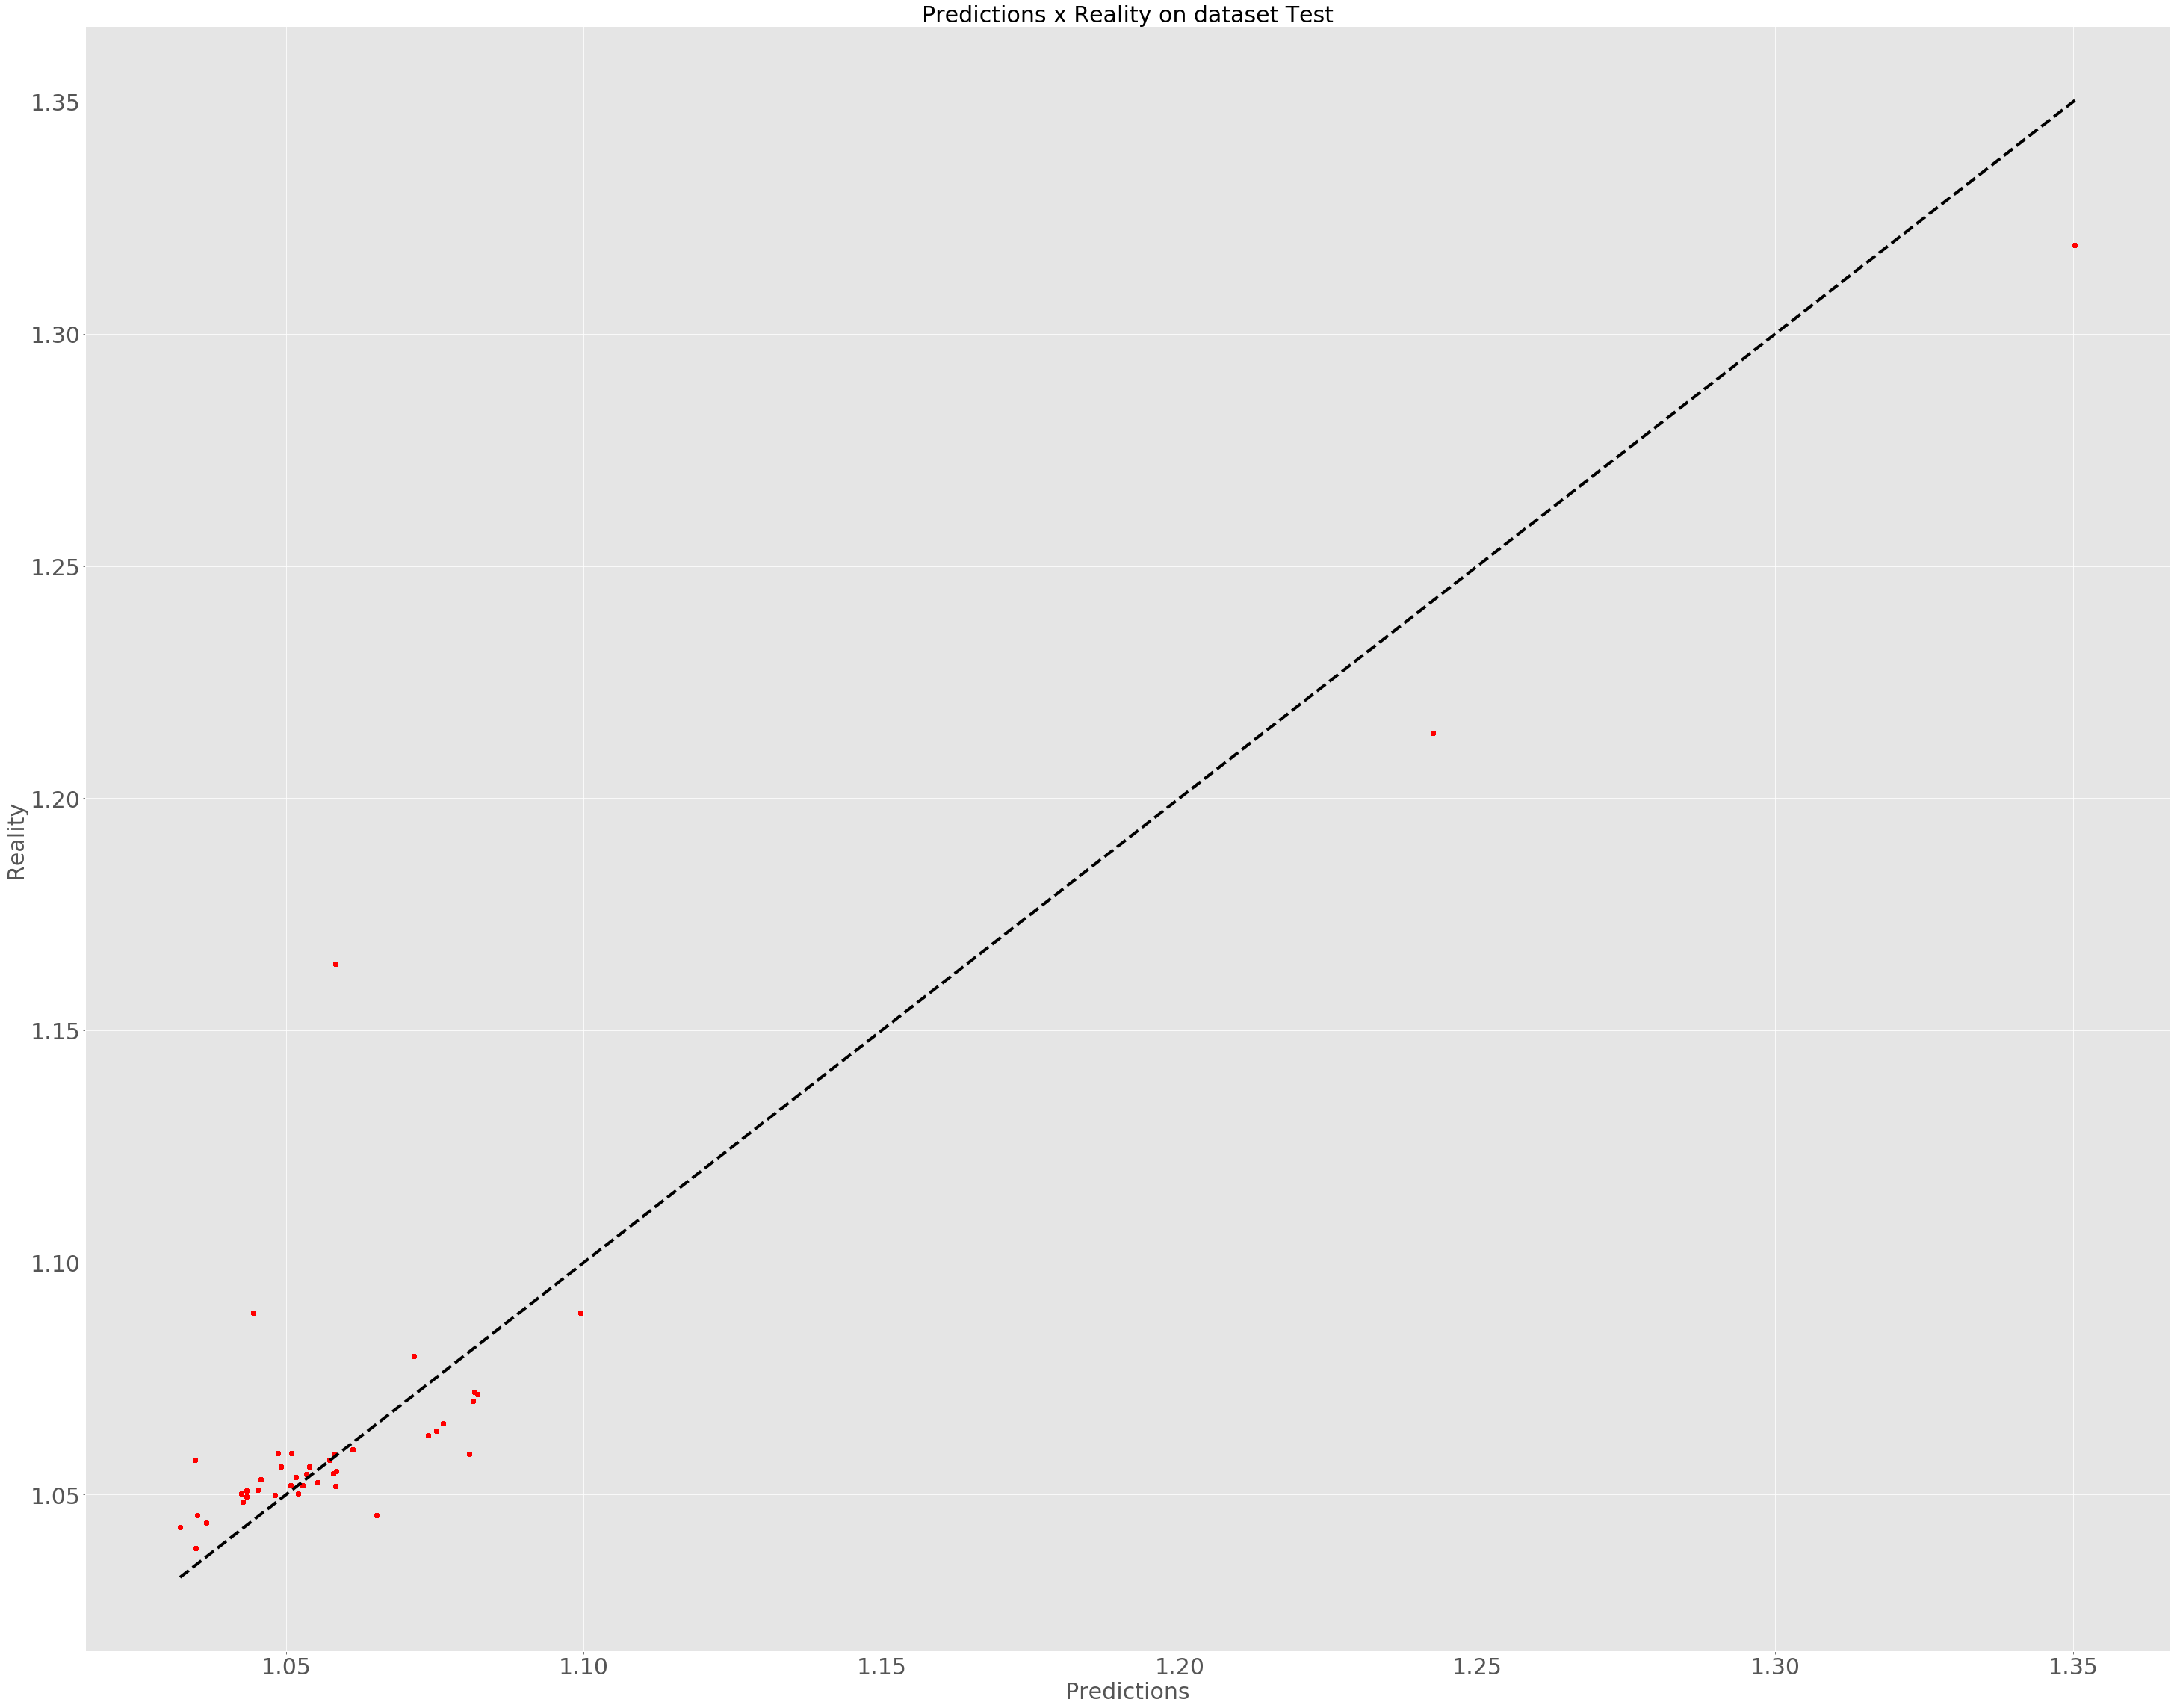

In [79]:
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig, ax = plt.subplots(figsize=(50, 40))

plt.style.use('ggplot')
plt.plot(Y_true, Y_pred_test, 'ro')
plt.xlabel('Predictions', fontsize = 30)
plt.ylabel('Reality', fontsize = 30)
plt.title('Predictions x Reality on dataset Test', fontsize = 30)
ax.plot([Y_true.min(), Y_true.max()], [Y_true.min(), Y_true.max()], 'k--', lw=4)
plt.show()


In [80]:
from sklearn.metrics import mean_squared_error

In [81]:
mean_squared_error(Y_true, Y_pred_test)

0.0004320902493520246